#Hw1 of Applied Machine Learning
###Shuai Hao (sh3831)

This notebook is used to visualize the satellite data about the Australian wild fire. The dataset can be downloaded on [Kaggle](https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland/data). More information about the dataset can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/viirs-i-band-active-fire-data).


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!ls

gdrive	sample_data


In [4]:
%cd gdrive/"My Drive"/Australia-Fire

/content/gdrive/My Drive/Australia-Fire


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import sample
from matplotlib.widgets import Button
from ipywidgets import widgets, Layout, HBox
from IPython.display import display, clear_output

In [0]:
data = pd.read_csv("fire_nrt_V1_96617.csv")

In [7]:
data

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956252,-32.66628,122.15253,306.9,0.39,0.44,2020-01-11,1630,N,VIIRS,n,1.0NRT,288.6,0.8,N
956253,-32.58616,123.39582,299.0,0.51,0.41,2020-01-11,1630,N,VIIRS,n,1.0NRT,287.4,0.7,N
956254,-33.37853,115.94735,309.7,0.40,0.60,2020-01-11,1630,N,VIIRS,n,1.0NRT,291.7,1.0,N
956255,-33.21827,115.75078,300.2,0.49,0.65,2020-01-11,1806,N,VIIRS,n,1.0NRT,290.2,1.1,N


## Task1

### 1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):

In [0]:
subsample = data.loc[sample(list(data.index), 100000)]

In [9]:
subsample

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
66942,-11.98043,133.24434,345.3,0.58,0.52,2019-10-16,406,N,VIIRS,n,1.0NRT,310.1,20.9,D
515505,-34.18946,150.34322,312.9,0.41,0.37,2019-12-09,1506,N,VIIRS,n,1.0NRT,291.4,1.2,N
947882,-19.93410,144.19568,346.4,0.41,0.37,2020-01-10,348,N,VIIRS,l,1.0NRT,317.6,10.1,D
507500,-35.32772,149.67101,339.2,0.39,0.36,2019-12-09,348,N,VIIRS,l,1.0NRT,312.2,5.4,D
931313,-32.45506,121.32850,367.0,0.55,0.68,2020-01-07,442,N,VIIRS,h,1.0NRT,322.0,26.6,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650478,-34.26443,150.53584,301.4,0.39,0.36,2019-12-20,1500,N,VIIRS,n,1.0NRT,289.6,0.9,N
658329,-35.10789,150.32379,323.3,0.39,0.36,2019-12-20,1500,N,VIIRS,n,1.0NRT,291.9,2.5,N
305201,-14.93897,126.83764,353.7,0.42,0.61,2019-11-17,548,N,VIIRS,n,1.0NRT,319.9,9.7,D
580451,-18.14967,143.77002,367.0,0.78,0.78,2019-12-17,300,N,VIIRS,h,1.0NRT,296.7,39.8,D


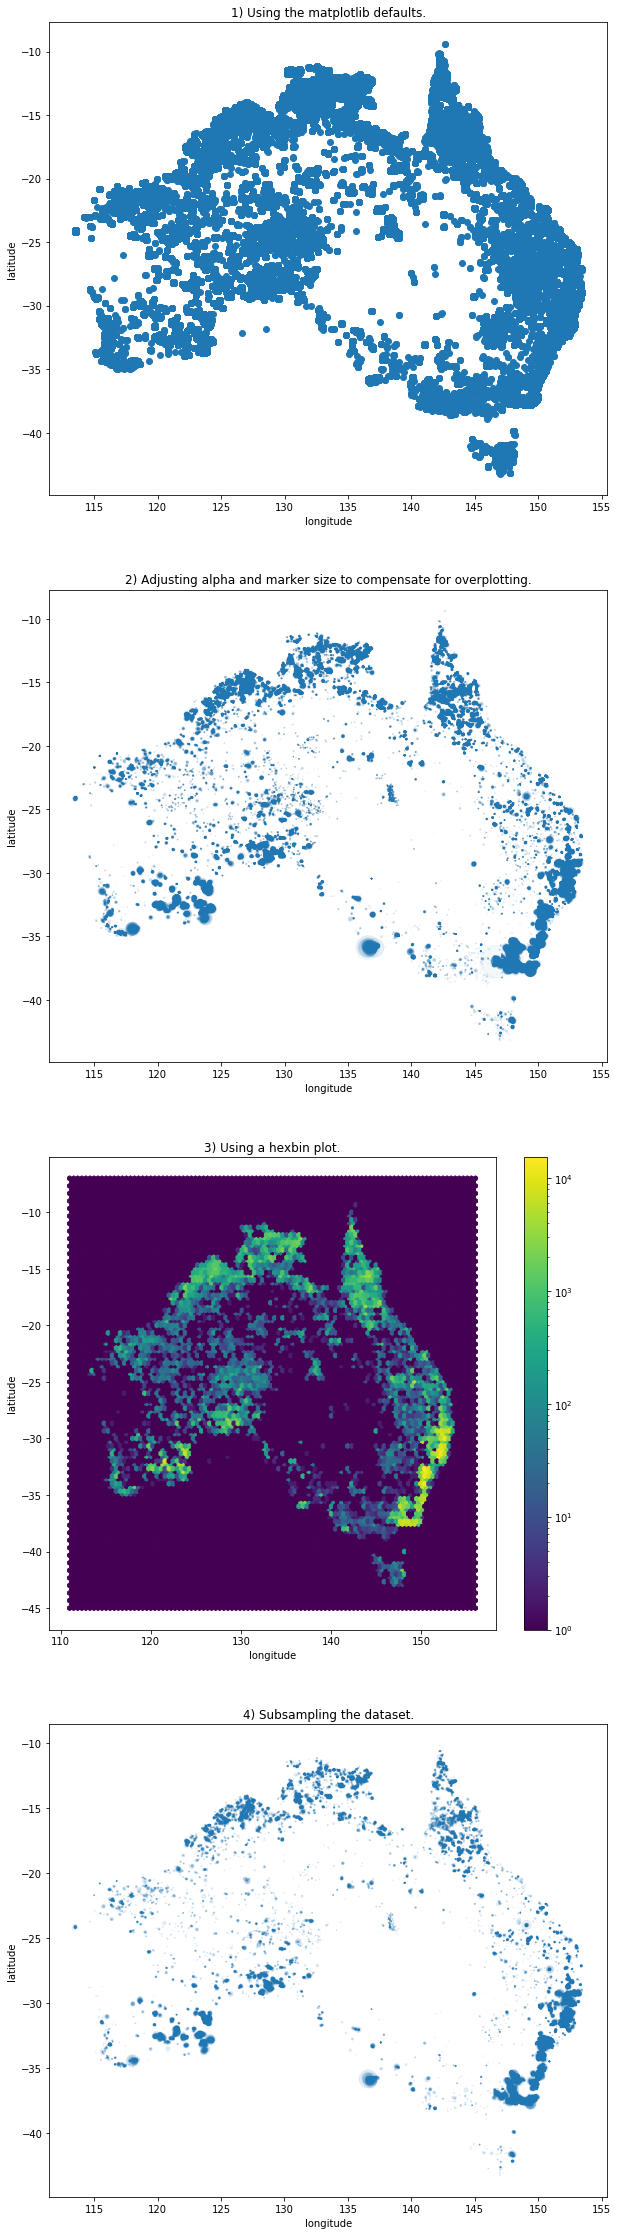

In [10]:
fig, ax = plt.subplots(4, 1, figsize=(10,40))
ax[0].scatter(x = data["longitude"], y = data["latitude"])
ax[0].title.set_text("1) Using the matplotlib defaults.")
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("latitude")
ax[1].scatter(x = data["longitude"], y = data["latitude"], s = (data["frp"]/10), alpha = 0.05)
ax[1].title.set_text("2) Adjusting alpha and marker size to compensate for overplotting.")
ax[1].set_xlabel("longitude")
ax[1].set_ylabel("latitude")
hb = ax[2].hexbin(x = data["longitude"], y = data["latitude"], bins = 'log', extent = [111,156,-45,-7])
ax[2].title.set_text("3) Using a hexbin plot.")
ax[2].set_xlabel("longitude")
ax[2].set_ylabel("latitude")
ax[3].scatter(x = subsample["longitude"], y = subsample["latitude"], s = (subsample["frp"]/10), alpha = 0.1)
ax[3].title.set_text("4) Subsampling the dataset.")
ax[3].set_xlabel("longitude")
ax[3].set_ylabel("latitude")
fig.colorbar(hb, ax=ax[2])
plt.show()

### 1.2 In what areas are most of the anomalies (measurements) located?
Most of the anomalies are located in the southwestern part Australia. Big cities like Sydney and Melbourne and some famous Australian National Parks are located in the same area.

## Task2

Visualize the distribution of Brightness temperature I-4 as a histogram

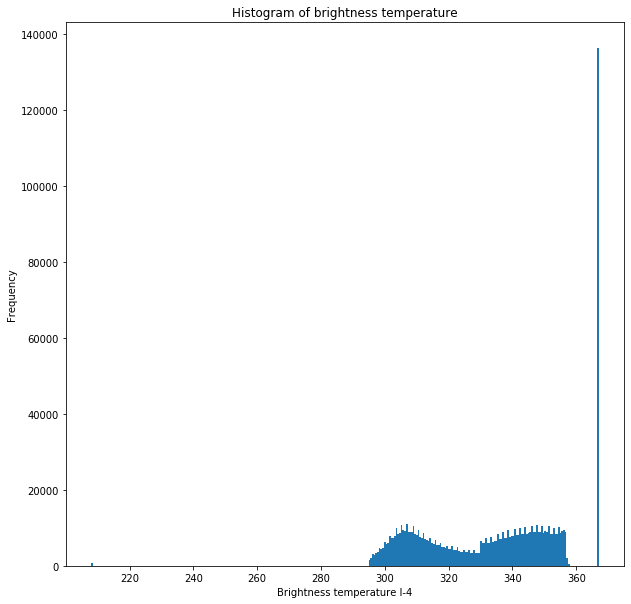

In [11]:
plt.figure(figsize=(10, 10))
plt.hist(x = data["bright_ti4"], bins=300)
plt.xlabel("Brightness temperature I-4")
plt.ylabel("Frequency")
plt.title("Histogram of brightness temperature")
plt.show()

### 2.1 Do a small multiples plot of whether the brightness is saturated. Can you spot differences in the distributions?

In [0]:
maximum = data["bright_ti4"].max()

In [0]:
saturated = data[data["bright_ti4"] == maximum]

In [0]:
not_saturated = data[data["confidence"] != maximum]

In [15]:
saturated

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
43,-22.41233,150.68094,367.0,0.42,0.38,2019-10-01,342,N,VIIRS,h,1.0NRT,298.9,6.9,D
52,-19.94326,147.91037,367.0,0.38,0.36,2019-10-01,342,N,VIIRS,h,1.0NRT,310.0,7.0,D
60,-26.20142,146.65320,367.0,0.43,0.38,2019-10-01,342,N,VIIRS,h,1.0NRT,316.7,12.2,D
87,-22.50325,150.71536,367.0,0.42,0.38,2019-10-01,342,N,VIIRS,h,1.0NRT,302.0,16.4,D
102,-18.32221,142.46642,367.0,0.55,0.43,2019-10-01,342,N,VIIRS,h,1.0NRT,322.5,13.2,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954996,-35.62225,148.51337,367.0,0.47,0.40,2020-01-11,1448,N,VIIRS,h,1.0NRT,284.8,9.5,N
955816,-36.35929,147.72372,367.0,0.49,0.40,2020-01-11,1448,N,VIIRS,h,1.0NRT,296.0,16.2,N
955866,-36.73418,146.58713,367.0,0.54,0.42,2020-01-11,1448,N,VIIRS,h,1.0NRT,363.4,107.5,N
955877,-36.73524,146.58754,367.0,0.54,0.42,2020-01-11,1448,N,VIIRS,h,1.0NRT,348.8,63.1,N


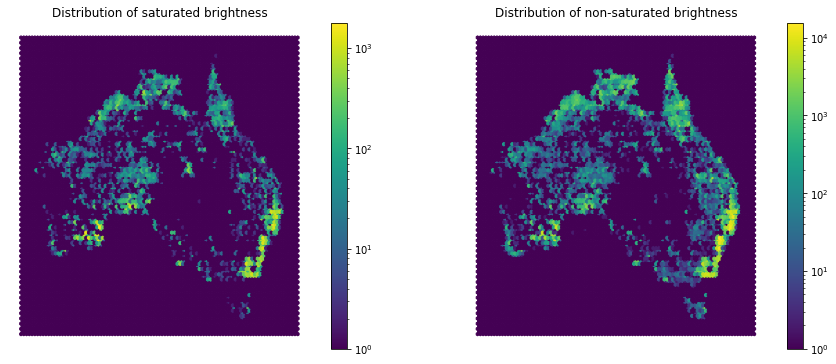

In [16]:
fig2, ax2 = plt.subplots(1, 2, figsize=(15,6))
hb1 = ax2[0].hexbin(x = saturated["longitude"], y = saturated["latitude"], bins = 'log', extent = [111,156,-45,-7])
ax2[0].title.set_text("Distribution of saturated brightness")
hb2 = ax2[1].hexbin(x = not_saturated["longitude"], y = not_saturated["latitude"], bins = 'log', extent = [111,156,-45,-7])
ax2[1].title.set_text("Distribution of non-saturated brightness")
fig2.colorbar(hb1, ax=ax2[0])
ax2[0].axis("off")
fig2.colorbar(hb2, ax=ax2[1])
ax2[1].axis("off")
plt.show()

The differences I spot are that saturated brightness was observed more often in the southwest, southeast and north of Australia, while not-saturated brightness can be found mainly in the southeast of Australia.

### 2.2 Plot both groups in the same axes with different colors.

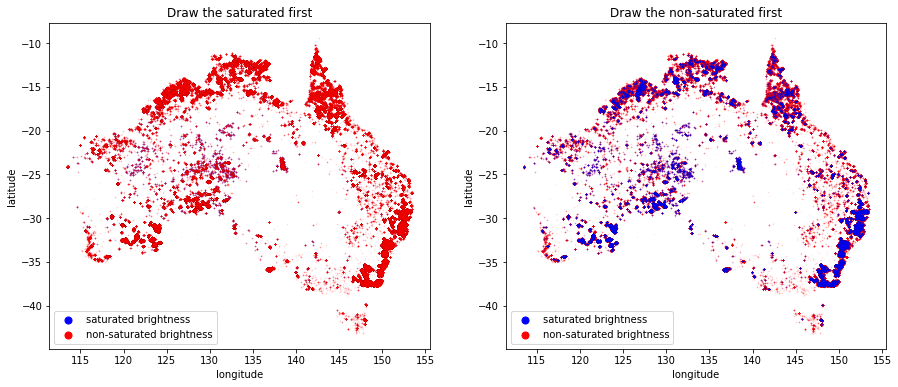

In [17]:
fig3, ax3 = plt.subplots(1, 2, figsize=(15,6))
sa1 = ax3[0].scatter(x = saturated["longitude"], y = saturated["latitude"], s = 0.5, c='b', alpha = 0.05)
nsa1= ax3[0].scatter(x = not_saturated["longitude"], y = not_saturated["latitude"], s = 0.5, c='r', alpha = 0.05)
ax3[0].title.set_text("Draw the saturated first")
leg1 = ax3[0].legend((sa1,nsa1), ("saturated brightness", "non-saturated brightness"), markerscale = 10)
for lh in leg1.legendHandles: 
    lh.set_alpha(1)
sa2 = ax3[1].scatter(x = not_saturated["longitude"], y = not_saturated["latitude"], s = 0.5, c='r', alpha = 0.05)
nsa2 = ax3[1].scatter(x = saturated["longitude"], y = saturated["latitude"], s = 0.5, c='b', alpha = 0.05)
ax3[1].title.set_text("Draw the non-saturated first")
leg2 = ax3[1].legend((nsa2, sa2), ("saturated brightness", "non-saturated brightness"), markerscale = 10)
for lh in leg2.legendHandles: 
    lh.set_alpha(1)
ax3[0].set_xlabel("longitude")
ax3[0].set_ylabel("latitude")
ax3[1].set_xlabel("longitude")
ax3[1].set_ylabel("latitude")
plt.show()

I use color blue to represent the saturated class and color red for the non-saturated class. When I draw the saturated class first, the map is almost covered in red because 88.7 percent of the data points are in the non-saturated class. When I draw the non-saturated class first, the problem was partly solved.

### 2.3 Can you find a better way to compare the two distributions?

I tried to use two-dimensional histogram to compare the two distributions. I first display two distributions side by side and we can see that bright colors are more common in the saturated brightness class. 

Then, I use ipython widgets to display the two distributions interactively, but the result doesn't look very intuitive because it takes time to load the graphs.

In [0]:
nbins= 100
x1 = saturated["longitude"]
y1 = saturated["latitude"]
x2 = not_saturated["longitude"]
y2 = not_saturated["latitude"]

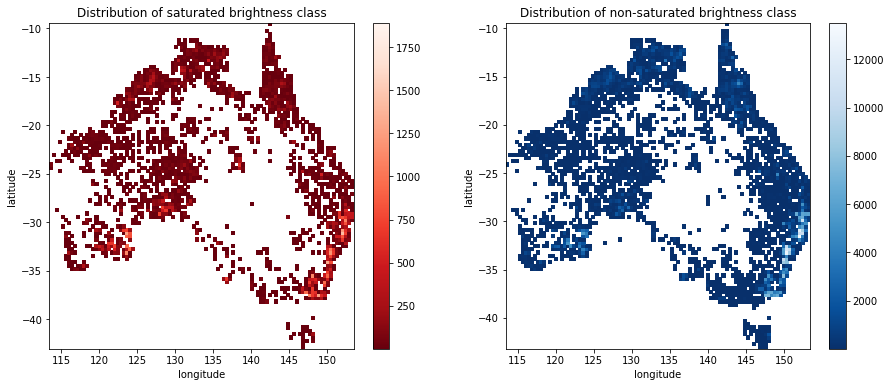

In [19]:
fig4, ax4 = plt.subplots(1, 2, figsize=(15,6))

# ax4[0].pcolormesh(a1, b1, c1.reshape(a1.shape), cmap=plt.cm.Reds_r)
h1 = ax4[0].hist2d(x1, y1, bins= nbins, cmap=plt.cm.Reds_r, cmin = 1)
ax4[0].title.set_text("Distribution of saturated brightness class")
ax4[0].set_xlabel("longitude")
ax4[0].set_ylabel("latitude")
fig4.colorbar(h1[3], ax=ax4[0])

h2 = ax4[1].hist2d(x2, y2, bins= nbins, cmap=plt.cm.Blues_r, cmin = 1)
# ax4[1].pcolormesh(a2, b2, c2.reshape(a2.shape), cmap=plt.cm.Reds_r)
ax4[1].title.set_text("Distribution of non-saturated brightness class")
ax4[1].set_xlabel("longitude")
ax4[1].set_ylabel("latitude")
fig4.colorbar(h2[3], ax=ax4[1])
# plt.scatter(x = saturated["longitude"], y = saturated["latitude"], s = 0.5, c='b', alpha = 0.05)
# plt.scatter(x = not_saturated["longitude"], y = not_saturated["latitude"], s = 0.5, c='r', alpha = 0.05)
plt.show()

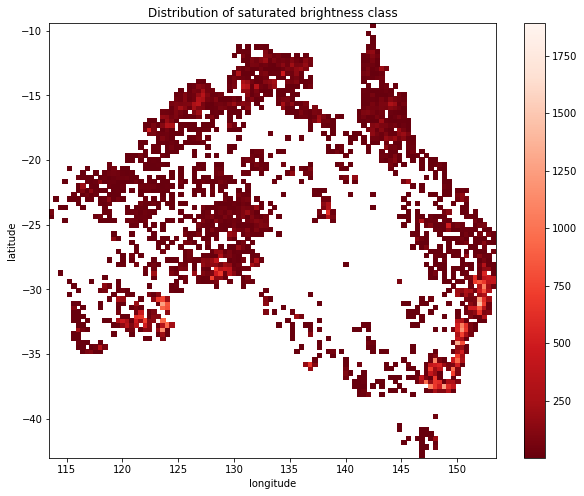

In [0]:
def on_button_clicked1(b):
    clear_output(wait=True)
    display(HBox(([button1, button2])))
    plt.figure(figsize=(10, 8))
    plt.hist2d(x1, y1, bins= nbins, cmap=plt.cm.Reds_r, cmin = 1)
    plt.title("Distribution of saturated brightness class")

    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.colorbar()

    plt.show()

def on_button_clicked2(b):
    clear_output(wait=True)
    display(HBox(([button1, button2])))
    plt.figure(figsize=(10, 8))
    h2 = plt.hist2d(x2, y2, bins= nbins, cmap=plt.cm.Blues_r, cmin = 1)
    plt.title("Distribution of non-saturated brightness class")

    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.colorbar()

    plt.show()

button1 = widgets.Button(description="Saturated Brightness Class", layout=Layout(width='300px', height='50px'))
button2 = widgets.Button(description="Non-saturated Brightness Class", layout=Layout(width='300px', height='50px'))
display(HBox(([button1, button2])))
# display(button1)
# display(button2)

button1.on_click(on_button_clicked1)
button2.on_click(on_button_clicked2)